# Домашнее задание "Теория вероятности. Дискретные Случайные Величины".

### Уровень 0:

- Задание 1

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов.

Количество экспериментов (n) - 15. 

Количество простых чисел от 1 до 15 - 6 (2,3,5,7,11,13).

Так как броски монет - события независимые (результат броска одной монеты не влияет на последующие броски), вероятность выпадения герба в каждом броске одинакова (и равна p=1/2=0.5), то можно для вычисления вероятности применить формулу Бернулли:

p(k) = c*((1/2)**n) = с/32768, где c = n!/(k!*(n-k)!)

После чего сложим вероятности всех событий:

p = (p(2)+p(3)+p(5)+p(7)+p(11)+p(13))/32768 = 105+455+3003+6435+1365+105 = 11468/32768 = 0,35

In [ ]:
import math
import numpy as np

In [ ]:
n = 15
csum = 0
for k in [2,3,5,7,11,13]:
    csum += math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

print(f'Вероятность выпадения простого числа орлов при 15 подбрасываниях равна {round(csum * 100 / 2**n, 0)} %')

Вероятность выпадения простого числа орлов при 15 подбрасываниях равна 35.0 %


*Или*

In [ ]:
b = np.random.binomial(15, 0.5, 2**15 * 6)                                                          # 2**15 * 6 = 196608
total = sum(b == 2) + sum(b == 3) + sum(b == 5) + sum(b == 7) + sum(b == 11) + sum(b == 13)      # Простые числа до 15
print(f'Вероятность выпадения простого числа орлов при 15 подбрасываниях равна {round(total * 100 / (2**15 * 6), 0)} %')

Вероятность выпадения простого числа орлов при 15 подбрасываниях равна 35.0 %


- Задание 2

Создайте свою дискретную случайную величину с не менее, чем 10 значениями. 
Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sample = np.random.randint(0, 10, 1000)

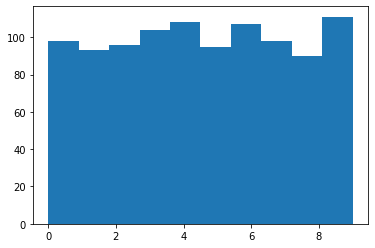

In [ ]:
plt.hist(sample)
plt.show()

In [ ]:
print(f'Среднее: {sample.mean()}',
      f'Дисперсия: {sample.var()}',
      f'Медиана: {np.median(sample)}', sep='\n')

Среднее: 4.548
Дисперсия: 8.493696
Медиана: 5.0


### Уровень 1:

- Задание 3

Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

- A1 - монеты 1 и 2 упали одной и той же стороной,
- A2 - монеты 2 и 3 упали одной и той же стороной,
- A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.


### *Объяснение*
*Они будут попано независимыми, так как любое из событий содержит в себе по одному подкидыванию двух монеток. Любое второе событие, по сути, добавляет бросок третьей монеты, никак не зависящий от первых двух. А вот если добавить третье событие - все результаты подбрасываний уже определены, соответсвенно, третье событие неизбежно оказывается зависимым от первых двух.*

Попарная независимость:

$P(A_1 \cap A_2) = P(A_1) * P(A_2)$

$P(A_1)= P(A_2) = 1/2$ - нас устраивают два события из четырех возможных исходов

$P(A_1 \cap A_2) = 2/8 $ - вероятность наступления двух событий одновременно возможно. когда все три монеты упали одной и той же стороной. А это два из восьми возможных событий. Проверяем равенство:

$\frac{1}{2} * \frac{1}{2}  = \frac{2}{8};$ $\frac{1}{4} = \frac{1}{4}$

то есть события независимы.

Для событий $P(A_1)$ и $P(A_3)$; $P(A_2)$ и $P(A_3)$ рассуждения аналогичны

Проверяем независимость в совокупности:

$P(A_1 \cap A_2 \cap A_3) = P(A_1) * P(A_2)  * P(A_3)$

$P(A_1)= P(A_2) = P(A_2) = 1/2$

$P(A_1 \cap A_2 \cap A_3) = 2/8 $ - нас опять устраивает только два события из восьми, кода все три монеты выпадают или орлом, или решкой.

Проверяем равенство:

$P(A_1) * P(A_2)  * P(A_3) = \frac{1}{2} * \frac{1}{2} * \frac{1}{2} =  \frac{1}{8}$

$P(A_1 \cap A_2 \cap A_3) = \frac{1}{4}$

$\frac{1}{8} \neq \frac{1}{4}$

то есть события не являются независимыми в совокупности.

- Задание 4

В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее:
20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.


In [ ]:
p1 = 0.1
p2 = 0.05
p3 = 0.2

# Вычислим вероятность события с учётом разного количества товара:
x = 0.2 * p1 + 0.3 * p2 + 0.5 * p3
print(x * 100, '%')

13.5 %
